<div style="float:left">
            <h1 style="width:450px">CASA0007 Practical 5: Hypothesis Testing</h1>
</div>
<div style="float:right"><img width="100" src="https://github.com/jreades/i2p/raw/master/img/casa_logo.jpg" /></div>

## Welcome!

In this practical, we will apply the hypothesis testing techniques to the schools dataset.

- Mean comparison test;
- KS distribution test;

In [1]:
# import relevant packages

import numpy as np
import scipy.stats as sps
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Background 

Each schools trus tin the UK has to publish students performance. 
The variable 'PTL2BASICS_95_WGTAVG' represents the % of pupils at the end of KS4 achieving strong 9-5 passes in both English and mathematics GCSEs as a weighted average. 

In [ ]:
# Load the data 
data = pd.read_csv(f'/Users/bea/Documents/Teaching/CASA007/nbs_practicals/england_ks4-mats-performance.csv', encoding="latin1")
data = data[['TRUST_NAME', 'TRUST_LEADREGION', 'PTL2BASICS_95_WGTAVG']]

In [ ]:
data = data[['TRUST_NAME', 'TRUST_LEADREGION', 'PTL2BASICS_95_WGTAVG']]

# Define the regions 
south = ['South East', 'South West', 'London', 'East of England']
north = ['North East', 'North West', 'Yorkshire and The Humber', 'West Midlands', 'East Midlands']

In [18]:
# format the datatype as float converted from string 

data['PTL2BASICS_95_WGTAVG'] = data['PTL2BASICS_95_WGTAVG'].str.replace('%', '')
data['PTL2BASICS_95_WGTAVG'] = data['PTL2BASICS_95_WGTAVG'].str.replace(',', '')
data['PTL2BASICS_95_WGTAVG'] = data['PTL2BASICS_95_WGTAVG'].str.strip()
data['PTL2BASICS_95_WGTAVG'] = data['PTL2BASICS_95_WGTAVG'].replace('', np.nan)
data['PTL2BASICS_95_WGTAVG'] = data['PTL2BASICS_95_WGTAVG'].replace('N/A', np.nan)

data['PTL2BASICS_95_WGTAVG'] = data['PTL2BASICS_95_WGTAVG'].astype(float)

In [19]:
# For convenience store each sample seperately
data_south = data[data['TRUST_LEADREGION'].isin(south)]['PTL2BASICS_95_WGTAVG']
data_north = data[data['TRUST_LEADREGION'].isin(north)]['PTL2BASICS_95_WGTAVG']

In [23]:
# Print some summary information 

print("South Region Data Summary:")
data_south.describe()

South Region Data Summary:


count    97.000000
mean     45.350515
std      11.456477
min      12.000000
25%      38.000000
50%      45.000000
75%      51.000000
max      83.000000
Name: PTL2BASICS_95_WGTAVG, dtype: float64

In [22]:
# Print some summary information 

print("North Region Data Summary:")
data_north.describe()

North Region Data Summary:


count    91.000000
mean     41.010989
std       9.543461
min      25.000000
25%      33.000000
50%      41.000000
75%      46.500000
max      80.000000
Name: PTL2BASICS_95_WGTAVG, dtype: float64

In [24]:
# Store some useful values

min1 = data_south.min()
min2 = data_north.min()

max1 = data_south.max()
max2 = data_north.max()

mean1 = data_south.mean()
mean2 = data_north.mean()

std1 = data_south.std()
std2 = data_north.std()

n1 = len(data_south)
n2 = len(data_north)

<Axes: >

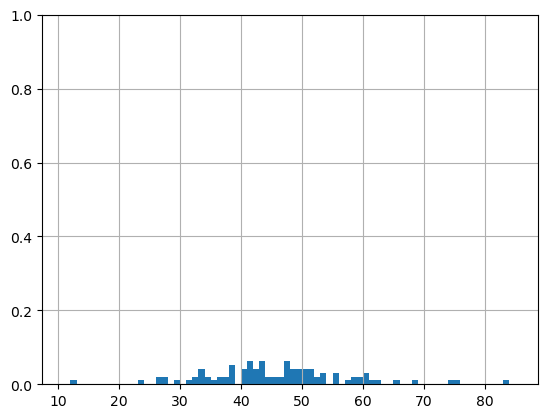

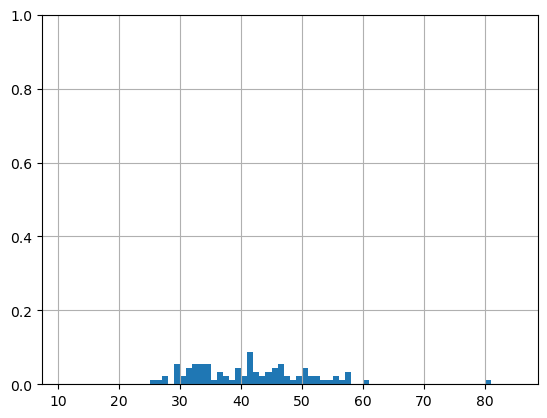

In [28]:
# Visualise the distribution of the data (as histograms)

# Set common x-limits for the histograms:
# (using int() is a trick to round to the integer below)
hist_min = int(min(min1,min2)) - 1
hist_max = int(max(max1,max2)) + 2
x_range = [hist_min, hist_max]

# Set common y-limits for the histograms:
y_range = [0,1]

# Choose an appropriate number of columns for the histogram:
# (This choice will give us columns of width 1)
n_cols = hist_max - hist_min

# Now create the plots:
# (The plt.figure(x) functions create new plots preventing...
# ... both histograms from being drawn on the same axes.)

plt.figure(1)
data_south.hist(range=x_range, bins=n_cols, density=True)
plt.ylim(y_range)

plt.figure(2)
plt.ylim(y_range)
data_north.hist(range=x_range, bins=n_cols, density=True)


## Background using some synthetic data 

The department for Education wants to understand how maths ability varies across England. 

The data is the percent (%) of pupils passing Maths GCSE in schools across two regions of England. 

Region 1: 100 schools 

Region 2: 100 schools 

In [ ]:
# generate 100 samples from a normal distribution 

mean_1 = 70 
std_1 = 8
n_samples = 100
sample_1 = sps.norm.rvs(loc=mean_1, scale=std_1, size=n_samples)
# to two decimal places
sample_1 = np.round(sample_1, 2)

mean_2 = 72
std_2 = 6
sample_2 = sps.norm.rvs(loc=mean_2, scale=std_2, size=n_samples)    
# to two decimal places
sample_2 = np.round(sample_2, 2)

In [38]:
data = pd.DataFrame({'region1': sample_1, 'region2': sample_2})

data.head()

,region1,region2
0,85.53,70.70
1,83.50,82.61
2,67.40,68.95
3,66.23,75.16
4,62.50,78.08


In [39]:
# For convenience...

# Store each sample separately:
region1 = data['region1']
region2 = data['region2']

# Store some useful values

min1 = region1.min()
min2 = region2.min()

max1 = region1.max()
max2 = region2.max()

mean1 = region1.mean()
mean2 = region2.mean()

std1 = region1.std()
std2 = region2.std()

n1 = len(region1)
n2 = len(region2)

# And print some summary information:

data.describe()

,region1,region2
count,100.000000,100.000000
mean,70.634900,72.116800
std,8.607044,7.310304
min,46.710000,51.710000
25%,65.380000,68.400000
50%,69.255000,72.700000
75%,76.895000,77.245000
max,90.460000,88.650000


Text(0, 0.5, 'Frequency')

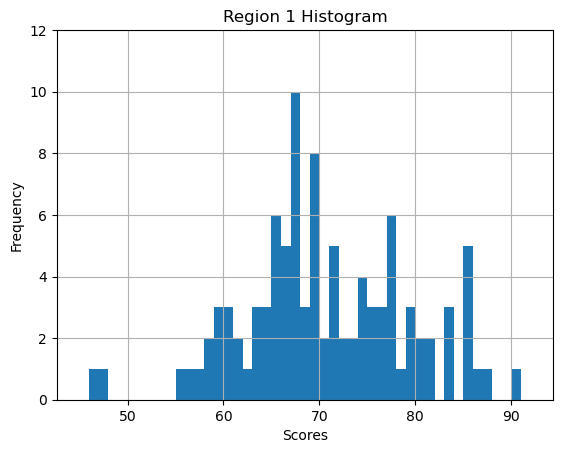

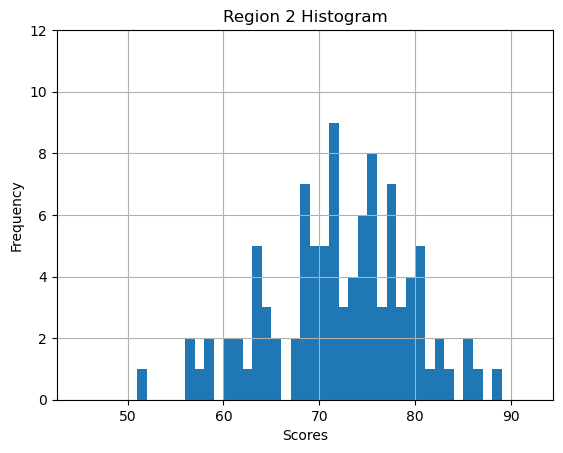

In [52]:
# Visualise the distribution of the data (as histograms)

# Set common x-limits for the histograms:
# (using int() is a trick to round to the integer below)
hist_min = int(min(min1,min2)) - 1
hist_max = int(max(max1,max2)) + 2
x_range = [hist_min, hist_max]

# Set common y-limits for the histograms:
y_range = [0,12]

# Choose an appropriate number of columns for the histogram:
# (This choice will give us columns of width 1)
n_cols = hist_max - hist_min

# Now create the plots:
# (The plt.figure(x) functions create new plots preventing...
# ... both histograms from being drawn on the same axes.)

# Note: you can set density=True in the hist() function to normalise the histogram
# (This will make the area under the histogram equal to 1, which is useful for
# comparing distributions.)

plt.figure(1)
data['region1'].hist(range=x_range, bins=n_cols)
plt.ylim(y_range)
plt.title('Region 1 Histogram')
plt.xlabel('Scores')
plt.ylabel('Frequency')

plt.figure(2)
plt.ylim(y_range)
data['region2'].hist(range=x_range, bins=n_cols)
plt.title('Region 2 Histogram')
plt.xlabel('Scores')
plt.ylabel('Frequency')


### Test 1 - Mean Comparison Test

The two samples have different means, but let's test whether this could be down to random chance.

Could they be drawn from populations with the same mean?

(The sample sizes (100) are fairly large so the mean comparison test is valid.)

Step 1

In [53]:
# H0: Mean of population 1 =  Mean of population 1
# H1: Mean of population 1 <> Mean of population 1

Step 2

In [54]:
# Set significance level:

alpha = 0.05

Step 3-4

In [55]:
# There is a built-in scipy.stats function (ttest_ind) that does steps 3 and 4 for us.
# We just need to know whether we can assume that the samples are drawn...
# ... from populations with the same standard deviation or not.
# (Provided neither standard deviation is double the other, this should be ok)

std_ratio = std1/std2

print("std_ratio =", std_ratio)

if std_ratio > 0.5 and std_ratio < 2:
    print("Can assume equal population standard deviations.")
    equal_stds = True
else:
    print("Cannot assume equal population standard deviations.")
    equal_stds = False

std_ratio = 1.177385157407103
Can assume equal population standard deviations.


In [57]:
# Calculate the test statistic and the p-value:
# There are two outputs from the function of sps.ttest_ind: the **test statistic** and the **p value**

test_stat, p_value = sps.ttest_ind(region1, region2, equal_var = equal_stds)
print("p-value =", p_value)

p-value = 0.1909446532744774


Step 5

In [58]:
# Reach a conclusion:

if p_value < alpha:
    print("p-value < significance threshold.")
    print("Reject H0. Accept H1.")
    print("Conclude that samples are drawn from populations with different means.")
elif p_value >= alpha:
    print("p-value >= significance threshold.")
    print("No significant evidence to reject H0.")
    print("Assume samples are drawn from populations with the same mean.")

p-value >= significance threshold.
No significant evidence to reject H0.
Assume samples are drawn from populations with the same mean.


### Test 2 - KS Distribution Test

What about the shape of the distributions?

Could the visible difference in the distributions (see the histograms) be down to random chance?

(The data is continuous, so the KS test is valid.)

Step 1

In [ ]:
# H0: Sample 1 and Sample 2 are drawn from identical distributions.
# H1: Sample 1 and Sample 2 are not drawn from identical distributions.

Step 2

In [ ]:
# Set significance level:

alpha = 0.05

Step 3-4

In [59]:
# There is a built-in scipy.stats function (ks_2samp) that does steps 3 and 4 for us:

KS_stat, p_value = sps.ks_2samp(region1,region2)

# Compare with the KS stat we calculated earlier:

print("KS stat =", KS_stat)
print("p-value =", p_value)

KS stat = 0.2
p-value = 0.03638428787491733


Step 5

In [60]:
# Reach a conclusion:

if p_value < alpha:
    print("p-value < significance threshold.")
    print("Reject H0. Accept H1.")
    print("Conclude that samples are drawn from populations with different distributions.")
elif p_value >= alpha:
    print("p-value >= significance threshold.")
    print("No significant evidence to reject H0.")
    print("Assume samples are drawn from populations with the same distribution.")

p-value < significance threshold.
Reject H0. Accept H1.
Conclude that samples are drawn from populations with different distributions.


## Conclusions

We have applied the mean comparison test and KS test to the schools data. 

Now, can you try these techniques to other datasets and describe your findings in the language of hypothesis testing? 

## Extension

Mei is cycling into main campus to attend the lecture for CASA007. When she get's to UCL she can't find anywhere to park her bike. She's about to give up when she finds a space in the bike rack next to the print room cafe. She locks up and sprints over to her lecture. 

'How comes you're so late?' her friend Toby asks. 

'There was no space for me to lock my bike!' Mei replies. 

'Probably because students cycle more than the general London population!’ Toby replies. 


1. Come up with a suitable research hypothesis, and formally state it. 

2. Decide on a statistical test. 

3. Decide on a significance level. 

4. What would be the Type I and Type II error? 

5. What data could you use as evidence to test your hypothesis? 


## Credits
### Contributors:
The following individuals have contributed to these teaching materials: Thomas Evans, Hannah Fry, [Huanfa Chen](huanfa.chen@ucl.ac.uk), [Bea Taylor](https://github.com/Bea-Taylor)

### License
These teaching materials are licensed under a mix of The MIT License and the Creative Commons Attribution-NonCommercial-ShareAlike 4.0 license.

### Acknowledgements
NA

### Dependencies
This notebook depends on the following libraries: pandas, matplotlib, numpy, scipy